# Final Project Machine Learning E - Credit Card Fraud Detection
### Group 15 - Ong Ming Sen AI
- Rayhan Arvianta Bayuputra (5025211217)
- Arif Nugraha Santosa (5025211048)
- Danno Denis Dhaifullah (5025211027)
- Ryan Abinugraha (5025211178)


In [1]:
# Core
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Data Balancing (5 strategies)
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score
)

# Preprocessing & Splitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler

# Utility
from collections import Counter

In [2]:
df = pd.read_csv('./creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## EDA

### Dataset Info

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
df.isnull().sum().max()

np.int64(0)

In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


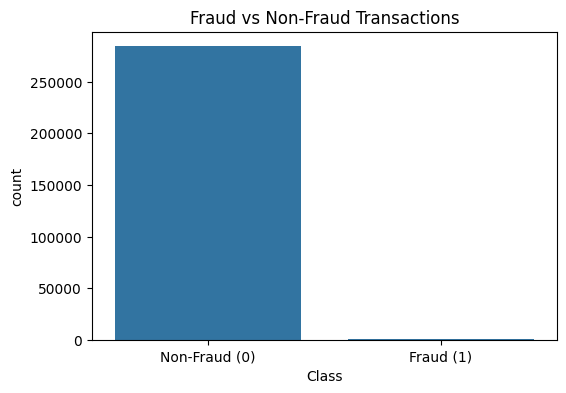

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Fraud vs Non-Fraud Transactions')
plt.xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

### Unscaled Features

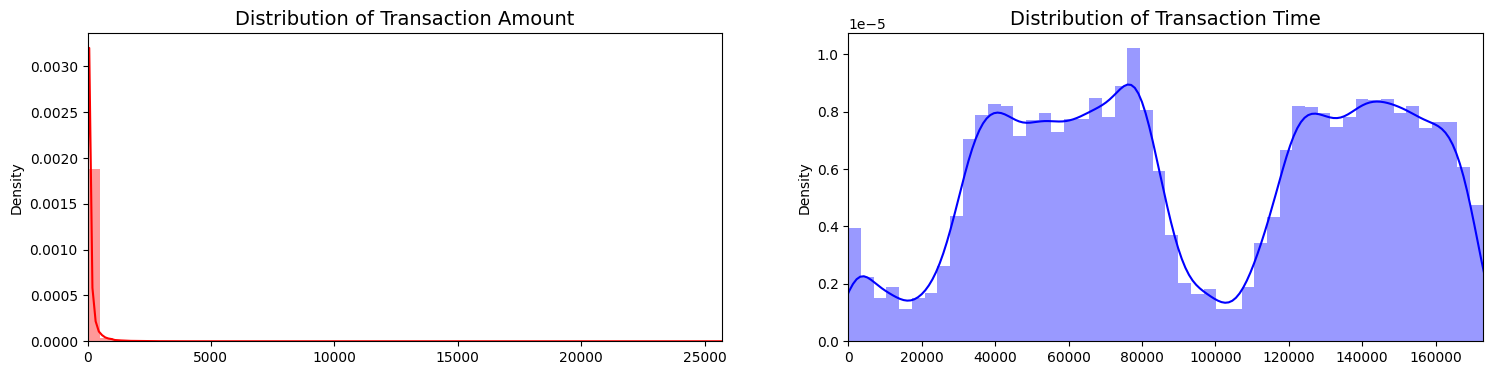

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])


plt.show()

## Preprocessing

#### Scale Time and Amount Columns

In [9]:
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [10]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


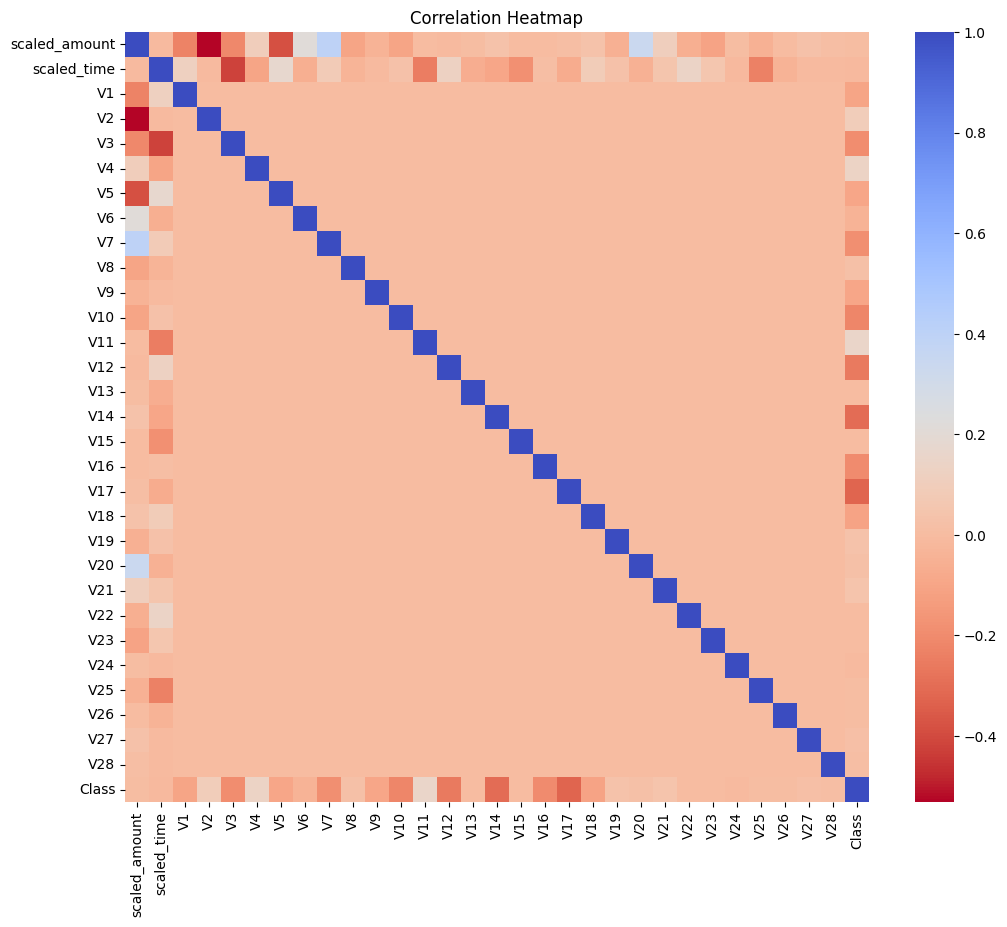

In [11]:
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm_r', annot=False)
plt.title("Correlation Heatmap")
plt.show()


### Split Dataset

In [12]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Before resampling:", Counter(y_train))


Before resampling: Counter({0: 227451, 1: 394})


In [13]:
# Check label distribution
train_unique_label, train_counts_label = np.unique(y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_test, return_counts=True)

print("\n=== Label Distribution Check ===")
print("Train Set:")
for label, count in zip(train_unique_label, train_counts_label):
    print(f"Class {label}: {count} ({count / len(y_train):.4%})")

print("Test Set:")
for label, count in zip(test_unique_label, test_counts_label):
    print(f"Class {label}: {count} ({count / len(y_test):.4%})")


=== Label Distribution Check ===
Train Set:
Class 0: 227451 (99.8271%)
Class 1: 394 (0.1729%)
Test Set:
Class 0: 56864 (99.8280%)
Class 1: 98 (0.1720%)


In [14]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-NN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [15]:
results = [] 

In [16]:
print("=== Sampling Strategy: RandomUnderSampler ===")
sampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
print("After resampling:", Counter(y_resampled))

strategy_results = []

for model_name, model in models.items():
    print(f"\n→ Training: {model_name}")
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print("Confusion Matrix:\n", cm)
    print(f"Precision: {precision:.4f} | Recall: {recall:.4f} | F1-Score: {f1:.4f}")

    strategy_results.append({
        'Sampling': 'RandomUnderSampler',
        'Model': model_name,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

results.extend(strategy_results)


=== Sampling Strategy: RandomUnderSampler ===
After resampling: Counter({0: 394, 1: 394})

→ Training: Logistic Regression
Confusion Matrix:
 [[54612  2252]
 [    8    90]]
Precision: 0.0384 | Recall: 0.9184 | F1-Score: 0.0738

→ Training: K-NN
Confusion Matrix:
 [[55315  1549]
 [    9    89]]
Precision: 0.0543 | Recall: 0.9082 | F1-Score: 0.1025

→ Training: SVM
Confusion Matrix:
 [[55720  1144]
 [   11    87]]
Precision: 0.0707 | Recall: 0.8878 | F1-Score: 0.1309

→ Training: Decision Tree
Confusion Matrix:
 [[51247  5617]
 [   11    87]]
Precision: 0.0153 | Recall: 0.8878 | F1-Score: 0.0300

→ Training: Random Forest
Confusion Matrix:
 [[54892  1972]
 [    8    90]]
Precision: 0.0436 | Recall: 0.9184 | F1-Score: 0.0833


In [17]:
print("=== Sampling Strategy: NearMiss ===")
sampler = NearMiss(version=1)
X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
print("After resampling:", Counter(y_resampled))

strategy_results = []

for model_name, model in models.items():
    print(f"\n→ Training: {model_name}")
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print("Confusion Matrix:\n", cm)
    print(f"Precision: {precision:.4f} | Recall: {recall:.4f} | F1-Score: {f1:.4f}")

    strategy_results.append({
        'Sampling': 'NearMiss',
        'Model': model_name,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

results.extend(strategy_results)


=== Sampling Strategy: NearMiss ===
After resampling: Counter({0: 394, 1: 394})

→ Training: Logistic Regression
Confusion Matrix:
 [[35489 21375]
 [    4    94]]
Precision: 0.0044 | Recall: 0.9592 | F1-Score: 0.0087

→ Training: K-NN
Confusion Matrix:
 [[46218 10646]
 [    7    91]]
Precision: 0.0085 | Recall: 0.9286 | F1-Score: 0.0168

→ Training: SVM
Confusion Matrix:
 [[52018  4846]
 [   12    86]]
Precision: 0.0174 | Recall: 0.8776 | F1-Score: 0.0342

→ Training: Decision Tree
Confusion Matrix:
 [[ 5441 51423]
 [    1    97]]
Precision: 0.0019 | Recall: 0.9898 | F1-Score: 0.0038

→ Training: Random Forest
Confusion Matrix:
 [[ 2466 54398]
 [    1    97]]
Precision: 0.0018 | Recall: 0.9898 | F1-Score: 0.0036


In [18]:
print("=== Sampling Strategy: SMOTE ===")
sampler = SMOTE(random_state=42)
X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
print("After resampling:", Counter(y_resampled))

strategy_results = []

for model_name, model in models.items():
    print(f"\n→ Training: {model_name}")
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print("Confusion Matrix:\n", cm)
    print(f"Precision: {precision:.4f} | Recall: {recall:.4f} | F1-Score: {f1:.4f}")

    strategy_results.append({
        'Sampling': 'SMOTE',
        'Model': model_name,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

results.extend(strategy_results)


=== Sampling Strategy: SMOTE ===
After resampling: Counter({0: 227451, 1: 227451})

→ Training: Logistic Regression
Confusion Matrix:
 [[55430  1434]
 [    8    90]]
Precision: 0.0591 | Recall: 0.9184 | F1-Score: 0.1110

→ Training: K-NN
Confusion Matrix:
 [[56750   114]
 [   12    86]]
Precision: 0.4300 | Recall: 0.8776 | F1-Score: 0.5772

→ Training: SVM
Confusion Matrix:
 [[56013   851]
 [   12    86]]
Precision: 0.0918 | Recall: 0.8776 | F1-Score: 0.1662

→ Training: Decision Tree
Confusion Matrix:
 [[56735   129]
 [   21    77]]
Precision: 0.3738 | Recall: 0.7857 | F1-Score: 0.5066

→ Training: Random Forest
Confusion Matrix:
 [[56853    11]
 [   16    82]]
Precision: 0.8817 | Recall: 0.8367 | F1-Score: 0.8586


In [19]:
print("=== Sampling Strategy: SMOTE + RandomUnderSampler ===")
sampler = ImbPipeline([
    ('smote', SMOTE(sampling_strategy=0.5, random_state=42)),
    ('under', RandomUnderSampler(sampling_strategy=0.8, random_state=42))
])
X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
print("After resampling:", Counter(y_resampled))

strategy_results = []

for model_name, model in models.items():
    print(f"\n→ Training: {model_name}")
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print("Confusion Matrix:\n", cm)
    print(f"Precision: {precision:.4f} | Recall: {recall:.4f} | F1-Score: {f1:.4f}")

    strategy_results.append({
        'Sampling': 'SMOTE + RandomUnderSampler',
        'Model': model_name,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

results.extend(strategy_results)


=== Sampling Strategy: SMOTE + RandomUnderSampler ===
After resampling: Counter({0: 142156, 1: 113725})

→ Training: Logistic Regression
Confusion Matrix:
 [[55694  1170]
 [    8    90]]
Precision: 0.0714 | Recall: 0.9184 | F1-Score: 0.1325

→ Training: K-NN
Confusion Matrix:
 [[56675   189]
 [    9    89]]
Precision: 0.3201 | Recall: 0.9082 | F1-Score: 0.4734

→ Training: SVM
Confusion Matrix:
 [[56187   677]
 [   11    87]]
Precision: 0.1139 | Recall: 0.8878 | F1-Score: 0.2019

→ Training: Decision Tree
Confusion Matrix:
 [[56652   212]
 [   21    77]]
Precision: 0.2664 | Recall: 0.7857 | F1-Score: 0.3979

→ Training: Random Forest
Confusion Matrix:
 [[56841    23]
 [   15    83]]
Precision: 0.7830 | Recall: 0.8469 | F1-Score: 0.8137


In [20]:
print("=== Sampling Strategy: SMOTE + NearMiss ===")
sampler = ImbPipeline([
    ('smote', SMOTE(sampling_strategy=0.5, random_state=42)),
    ('under', NearMiss(version=1))
])
X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
print("After resampling:", Counter(y_resampled))

strategy_results = []

for model_name, model in models.items():
    print(f"\n→ Training: {model_name}")
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print("Confusion Matrix:\n", cm)
    print(f"Precision: {precision:.4f} | Recall: {recall:.4f} | F1-Score: {f1:.4f}")

    strategy_results.append({
        'Sampling': 'SMOTE + NearMiss',
        'Model': model_name,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

results.extend(strategy_results)


=== Sampling Strategy: SMOTE + NearMiss ===
After resampling: Counter({0: 113725, 1: 113725})

→ Training: Logistic Regression
Confusion Matrix:
 [[51989  4875]
 [    7    91]]
Precision: 0.0183 | Recall: 0.9286 | F1-Score: 0.0359

→ Training: K-NN
Confusion Matrix:
 [[55786  1078]
 [   10    88]]
Precision: 0.0755 | Recall: 0.8980 | F1-Score: 0.1392

→ Training: SVM
Confusion Matrix:
 [[55438  1426]
 [    8    90]]
Precision: 0.0594 | Recall: 0.9184 | F1-Score: 0.1115

→ Training: Decision Tree
Confusion Matrix:
 [[55829  1035]
 [   14    84]]
Precision: 0.0751 | Recall: 0.8571 | F1-Score: 0.1380

→ Training: Random Forest
Confusion Matrix:
 [[56820    44]
 [   12    86]]
Precision: 0.6615 | Recall: 0.8776 | F1-Score: 0.7544


In [21]:
results_df = pd.DataFrame(results)
print(results_df.head())

             Sampling                Model  Precision    Recall  F1-Score
0  RandomUnderSampler  Logistic Regression   0.038429  0.918367  0.073770
1  RandomUnderSampler                 K-NN   0.054335  0.908163  0.102535
2  RandomUnderSampler                  SVM   0.070674  0.887755  0.130926
3  RandomUnderSampler        Decision Tree   0.015252  0.887755  0.029990
4  RandomUnderSampler        Random Forest   0.043647  0.918367  0.083333


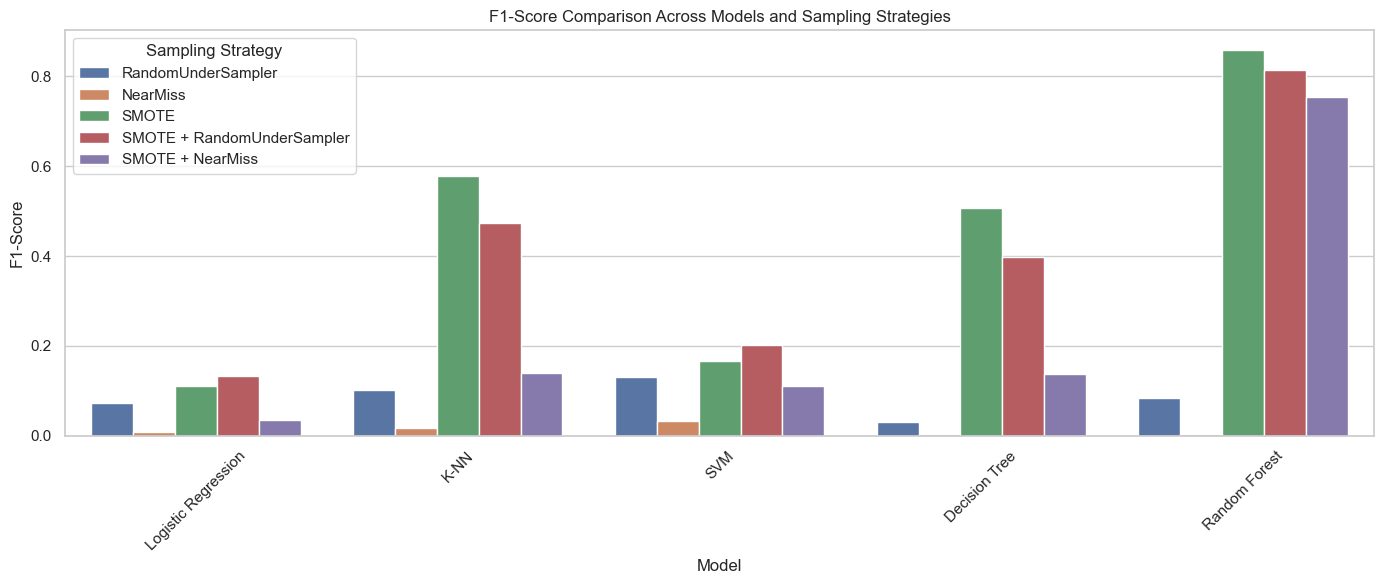

In [22]:
# Set up the plot style
sns.set(style="whitegrid")

# Plot F1-Score Comparison
plt.figure(figsize=(14, 6))
sns.barplot(
    data=results_df,
    x="Model",
    y="F1-Score",
    hue="Sampling"
)
plt.title("F1-Score Comparison Across Models and Sampling Strategies")
plt.xticks(rotation=45)
plt.legend(title="Sampling Strategy")
plt.tight_layout()
plt.show()

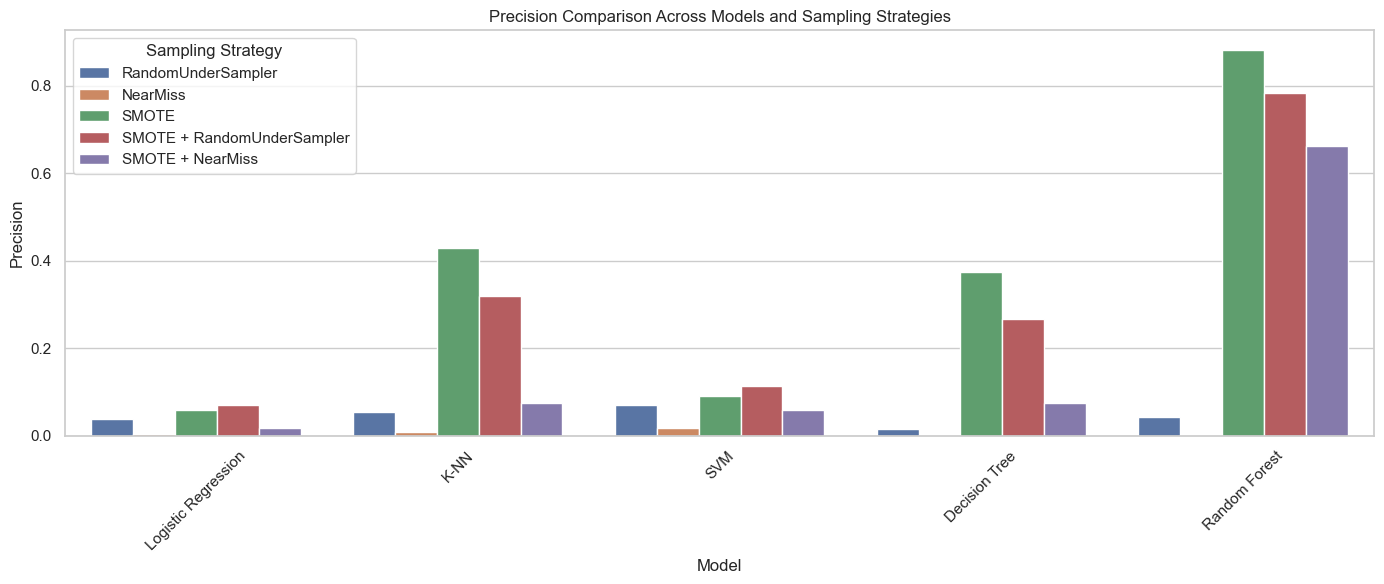

In [23]:
# Plot Precision Comparison
plt.figure(figsize=(14, 6))
sns.barplot(
    data=results_df,
    x="Model",
    y="Precision",
    hue="Sampling"
)
plt.title("Precision Comparison Across Models and Sampling Strategies")
plt.xticks(rotation=45)
plt.legend(title="Sampling Strategy")
plt.tight_layout()
plt.show()

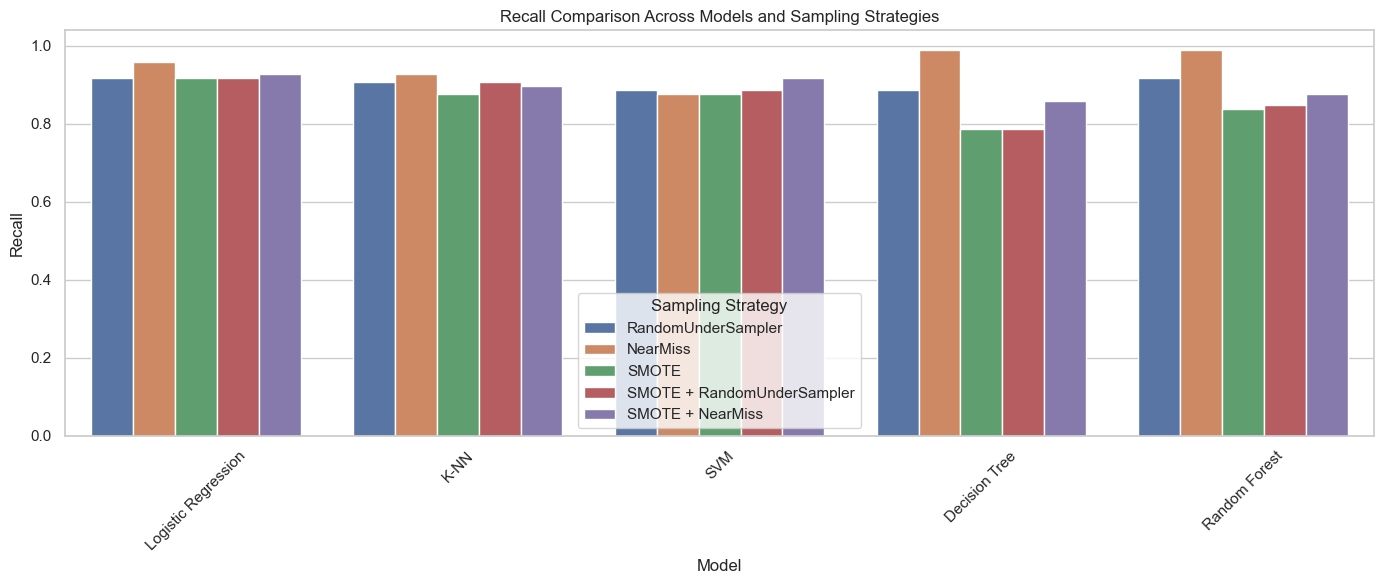

In [24]:
# Plot Recall Comparison
plt.figure(figsize=(14, 6))
sns.barplot(
    data=results_df,
    x="Model",
    y="Recall",
    hue="Sampling"
)
plt.title("Recall Comparison Across Models and Sampling Strategies")
plt.xticks(rotation=45)
plt.legend(title="Sampling Strategy")
plt.tight_layout()
plt.show()